In [34]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Funcion para crear los datos

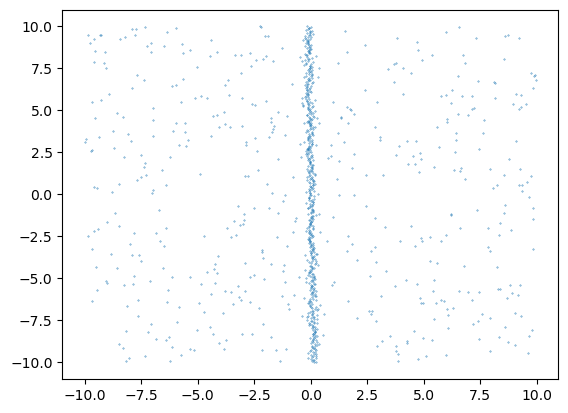

In [35]:
def random_value_from_intervals(a, b):
    if np.random.rand() < 0.5:
        return np.random.uniform(-a, -b)
    else:
        return np.random.uniform(a, b)


def get_data(n_points):
    m = random_value_from_intervals(50,100)
    xlim = 10/m

    x = np.linspace(-xlim, xlim,n_points)
    y = m*x
    x = x + np.random.normal(0, abs(xlim) ,n_points)

    x = np.concatenate([x, np.random.uniform(-10,10,n_points)])
    y = np.concatenate([y, np.random.uniform(-10,10,n_points)])

    return x, y

def get_wrong_data(n_points):
    x = np.random.uniform(-10,10,n_points)
    y = np.random.uniform(-10,10,n_points)
    return x, y

x, y = get_data(500)

plt.scatter(x, y, s = .1)
plt.show()


## Crear toda la database

In [36]:
porcentaje_malas = .2
n_pruebas = 100
n_pruebas_malas = round(porcentaje_malas * n_pruebas)
n_pruebas_buenas = n_pruebas - n_pruebas_malas

funciones = [get_data] * n_pruebas_buenas + [get_wrong_data] * n_pruebas_malas

random.shuffle(funciones)

data_points = []
data_NOK = []
for funcion in funciones:
    if funcion.__name__=='get_data':
        data_points.append(np.column_stack(get_data(500)))
        data_NOK.append('OK')
    else:
        data_points.append(np.column_stack(get_wrong_data(1000)))
        data_NOK.append('NOK')

data_points = np.array(data_points)

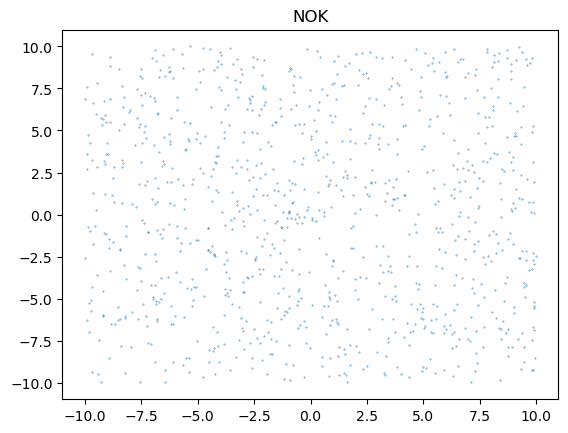

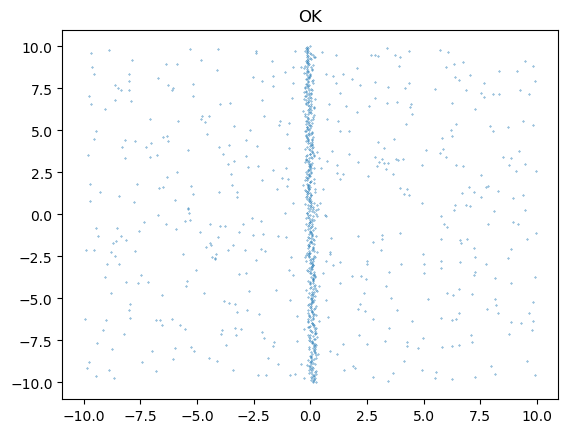

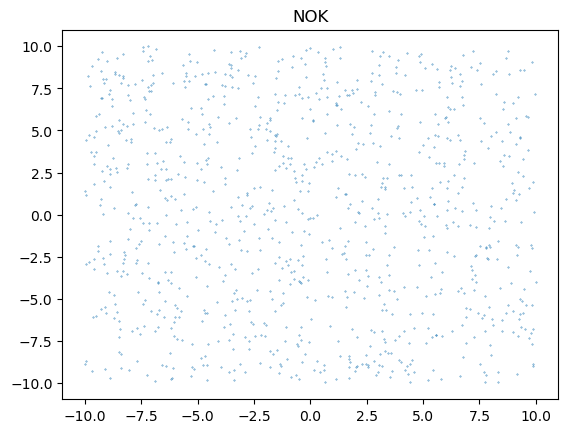

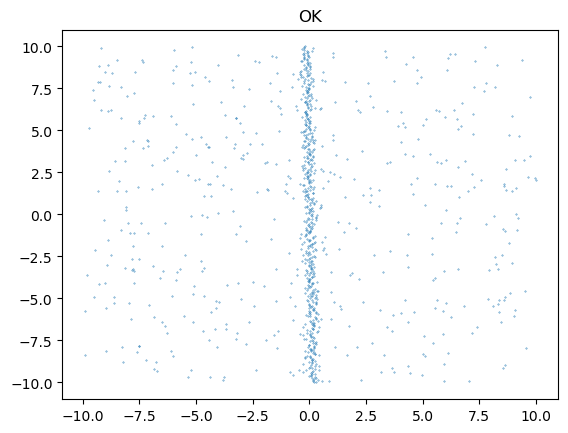

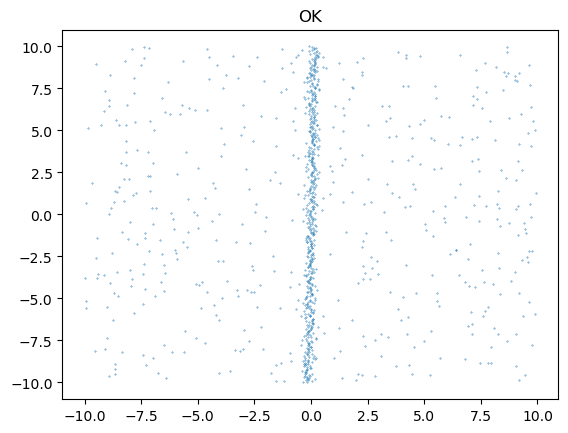

In [38]:
for i in range(5):
    plt.scatter(data_points[i][:,0], data_points[i][:,1], s = .1)
    plt.title(data_NOK[i])
    plt.show()

[-1.69318471e-02 -1.70495437e+01]
[0.04837141 0.13827134]
[-12.01673974   0.18411143]
[0.04837141 0.13827134]


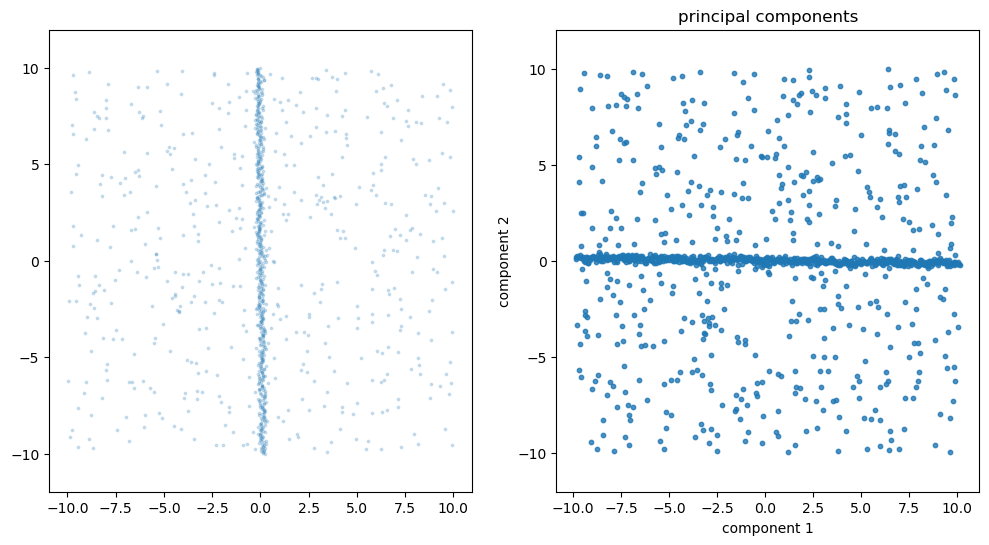

In [65]:
from sklearn.decomposition import PCA
n = 1
data = data_points[n]
pca = PCA()
pca.fit(data)
# print(pca.components_)
# print(pca.explained_variance_)

X_pca = pca.transform(data)
arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.scatter(data[:, 0], data[:, 1], s = 3, alpha=.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax1.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)
    print(pca.mean_ + v)
    print(pca.mean_)
ax2.scatter(X_pca[:, 0], X_pca[:, 1],s = 10, alpha=0.8)
ax1.axis('equal')
ax2.axis('equal')
ax2.set(xlabel='component 1', ylabel='component 2',title='principal components')
plt.show()


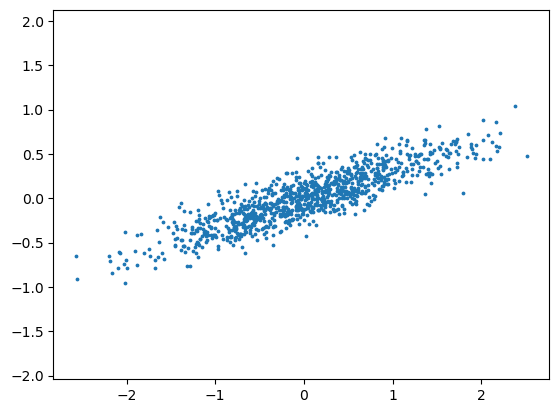

In [62]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 1000)).T
f, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s = 3)
ax.axis('equal')
plt.show()

[-2.51991246 -0.83057987]
[0.03675546 0.00926735]
---
[ 0.1696001  -0.39513912]
[0.03675546 0.00926735]
---


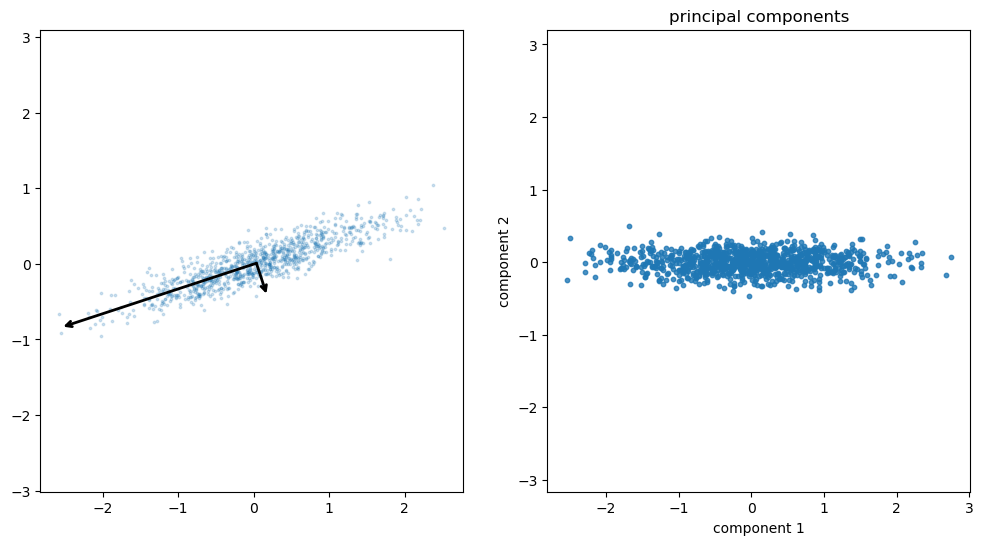

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.scatter(X[:, 0], X[:, 1], s = 3, alpha=.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax1.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)
    print(pca.mean_ + v)
    print(pca.mean_)
    print('---')
ax2.scatter(X_pca[:, 0], X_pca[:, 1],s = 10, alpha=0.8)
ax1.axis('equal')
ax2.axis('equal')
ax2.set(xlabel='component 1', ylabel='component 2',title='principal components')
plt.show()
